<a href="https://colab.research.google.com/github/AkashBalaji9/Deep-CNN---ECG-Classification/blob/main/CVD_1D_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#lead-9,revised 
import tensorflow
import tensorflow.keras
import numpy as np
import pandas as pd
import scipy.io
from keras.models import Sequential
from sklearn.model_selection import train_test_split

Xtr=scipy.io.loadmat('/content/X_train.mat')
Ytr=scipy.io.loadmat('/content/Y_train.mat')
Xte=scipy.io.loadmat('/content/X_test.mat')
Yte=scipy.io.loadmat('/content/Y_test.mat')

X_tra=Xtr['X_train']
Y_tra=Ytr['Y_train']
X_test=Xte['X_test']
Y_test=Yte['Y_test']

X_train,X_val,Y_train,Y_val=train_test_split(X_tra,Y_tra,test_size=0.15)

va=()    
va=X_val.shape
val=va[0]
print(val)
tra=()    
tra=X_train.shape
train=tra[0]
print(train)
tes=()    
tes=X_test.shape
test=tes[0]
print(test)
X_train=X_train.reshape(train,650,1)
X_test=X_test.reshape(test,650,1)
X_val=X_val.reshape(val,650,1)

4471
25335
29813


Epoch 1/5
792/792 [==============================] - 119s 149ms/step - loss: 1.3554 - accuracy: 0.4885 - val_loss: 0.3099 - val_accuracy: 0.8967
Epoch 2/5
792/792 [==============================] - 119s 150ms/step - loss: 0.2692 - accuracy: 0.9068 - val_loss: 0.1047 - val_accuracy: 0.9723
Epoch 3/5
792/792 [==============================] - 118s 150ms/step - loss: 0.0974 - accuracy: 0.9724 - val_loss: 0.0485 - val_accuracy: 0.9899
Epoch 4/5
792/792 [==============================] - 118s 149ms/step - loss: 0.0525 - accuracy: 0.9847 - val_loss: 0.0510 - val_accuracy: 0.9888
Epoch 5/5
792/792 [==============================] - 119s 150ms/step - loss: 0.0516 - accuracy: 0.9852 - val_loss: 0.0768 - val_accuracy: 0.9790


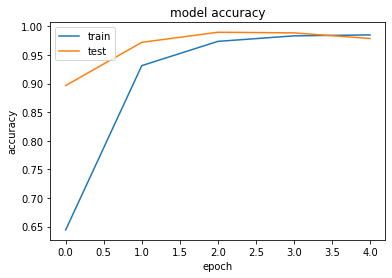

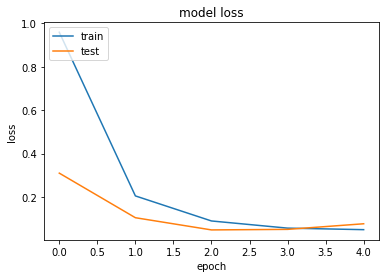

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from matplotlib import pyplot as plt

model = Sequential()

model.add(Conv1D(100, 10, activation=tf.nn.relu, input_shape=(650, 1)))
model.add(MaxPooling1D(3))

model.add(Conv1D(100, 10, activation=tf.nn.relu))
model.add(MaxPooling1D(3))

model.add(Flatten())

model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

model.add(Dropout(0.2))

model.add(tf.keras.layers.Dense(12, activation=tf.nn.softmax))

model.compile(optimizer = 'adam' ,
             loss = 'categorical_crossentropy' ,
             metrics = ['accuracy'])

history = model.fit(X_train, Y_train, epochs=5, validation_data=(X_val, Y_val))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(test_loss, test_acc)

932/932 [==============================] - 34s 37ms/step - loss: 0.0734 - accuracy: 0.9802
0.07343774288892746 0.9802099466323853


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3164
           1       0.98      0.98      0.98      3319
           2       0.98      0.98      0.98      5684
           3       1.00      1.00      1.00       135
           4       0.96      0.99      0.97      6284
           5       0.99      0.96      0.97      4026
           6       1.00      1.00      1.00        24
           7       1.00      0.96      0.98      1117
           8       0.95      1.00      0.97       228
           9       0.99      1.00      0.99       229
          10       1.00      1.00      1.00       386
          11       1.00      0.98      0.99      5217

    accuracy                           0.98     29813
   macro avg       0.98      0.99      0.99     29813
weighted avg       0.98      0.98      0.98     29813



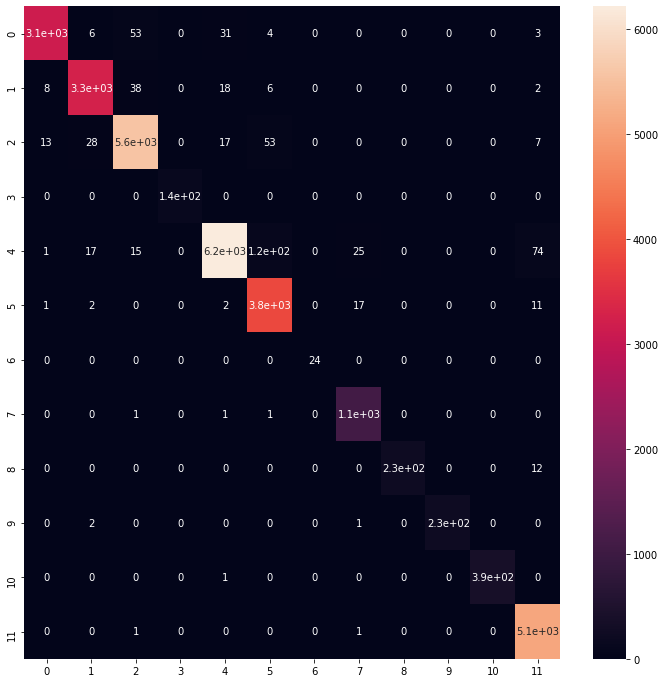

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from matplotlib import pyplot as plt

predictions = model.predict(X_test)
Y_pred = np.argmax(predictions, axis=1)
Y_test1 = np.argmax(Y_test, axis=1)

print(classification_report(Y_test1, Y_pred))

mat = confusion_matrix(Y_pred, Y_test1)
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(mat, annot = True)